In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import TreeSearch
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from IPython.display import Image

Building tree:   0%|          | 0/10.0 [00:00<?, ?it/s]

Nodos en el modelo: ['Cancer', 'Radiografia', 'Fumador', 'Disnea', 'Polucion'] 

Aristas en el modelo: [('Cancer', 'Radiografia'), ('Cancer', 'Fumador'), ('Cancer', 'Disnea'), ('Cancer', 'Polucion')] 



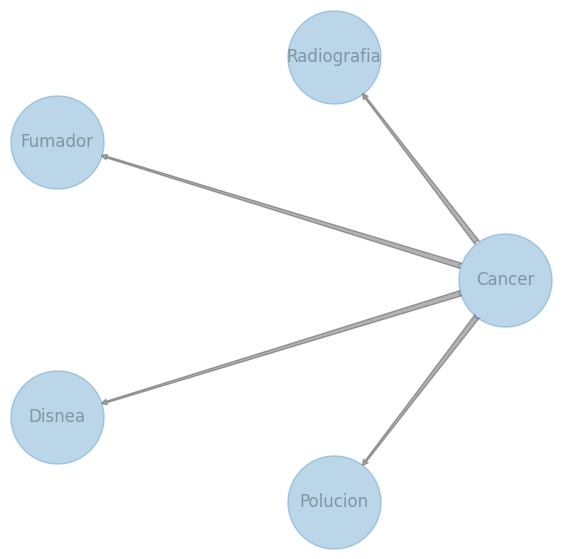

In [2]:
# Leer datos del fichero

datos = pd.read_csv("sample_cancer.csv")

# Estimar la estructura del grafo que mejor se ajusta a los datos sin los parámetros

est = TreeSearch(datos, root_node='Cancer')
model = est.estimate(estimator_type='chow-liu') # model es un grafo(DAG) 

# Acceder a los atributos del modelo

nodes = model.nodes()
edges = model.edges()
print(f"Nodos en el modelo: {nodes} \n")
print(f"Aristas en el modelo: {edges} \n")

# Dibujar la estructura

tam = 4500

fig,ax1 = plt.subplots(figsize=(7,7))
nx.draw_circular(model, with_labels=True, ax = ax1, arrowsize=10, arrowstyle='fancy',alpha=0.3,node_size = tam)
plt.show()

In [5]:
# Una vez estimada la estructura, se aprenden los parámetros

model2 = BayesianNetwork(model) # model es un DAG y se pasa a BayesianNetwork

model2.fit(datos) # por defecto es MaximumLikelihoodsEstimator
cpds = model2.get_cpds()

print(f"CPDs en el modelo: ")
for cpd in cpds:
    print(cpd)

# Guardar la red en un fichero bif

model2.save("cancer_model.bif", filetype='bif')

CPDs en el modelo: 
+----------------+---------+
| Cancer(falso)  | 0.98828 |
+----------------+---------+
| Cancer(verdad) | 0.01172 |
+----------------+---------+
+-----------------------+--------------------+---------------------+
| Cancer                | Cancer(falso)      | Cancer(verdad)      |
+-----------------------+--------------------+---------------------+
| Radiografia(negativa) | 0.8023434654146598 | 0.08873720136518772 |
+-----------------------+--------------------+---------------------+
| Radiografia(positiva) | 0.1976565345853402 | 0.9112627986348123  |
+-----------------------+--------------------+---------------------+
+-----------------+---------------------+---------------------+
| Cancer          | Cancer(falso)       | Cancer(verdad)      |
+-----------------+---------------------+---------------------+
| Fumador(falso)  | 0.7073703808637228  | 0.18430034129692832 |
+-----------------+---------------------+---------------------+
| Fumador(verdad) | 0.2926296191

In [4]:
# Inferencia usando la red aprendida

# Predecimos la probabilidad de los valores de la variable de salida

predict_data = datos[40000:]
predict_data = predict_data.copy()
predict_data.drop('Cancer', axis=1, inplace=True)
y_prob = model2.predict_probability(predict_data)
y_prob

,Cancer_falso,Cancer_verdad
40000,0.999857,0.000143
40001,0.999857,0.000143
40002,0.995440,0.004560
40003,0.999857,0.000143
40004,0.999857,0.000143
...,...,...
49995,0.999381,0.000619
49996,0.999572,0.000428
49997,0.999857,0.000143
49998,0.998471,0.001529


In [ ]:
# Predecir el valor de la variable de salida y calcular accuracy

from sklearn.metrics import accuracy_score

predict_data = datos[40000:]
ytest = predict_data['Cancer']
predict_data = predict_data.copy()
predict_data.drop('Cancer', axis=1, inplace=True)
ypred = model2.predict(predict_data)

print("Accuracy obtenido con el modelo = ",accuracy_score(ytest,ypred))